In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('bestsellers with categories.csv')

In [ ]:
print(df.head())
print("Розмір таблиці:", df.shape)

Про скільки книг зберігає дані датасет?
Відповідь: 550

In [3]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


In [ ]:
# Порахуємо, скільки пропусків міститься в кожній колонці (використовуючи методи isnull та sum)
print(df.isna().sum())


Первинне дослідження даних
Чи є в якихось змінних пропуски? (Так / ні)
Відповідь: Ні

In [ ]:
print(df['genre'].unique())

Які є унікальні жанри?
Відповідь: ['Non Fiction' 'Fiction']

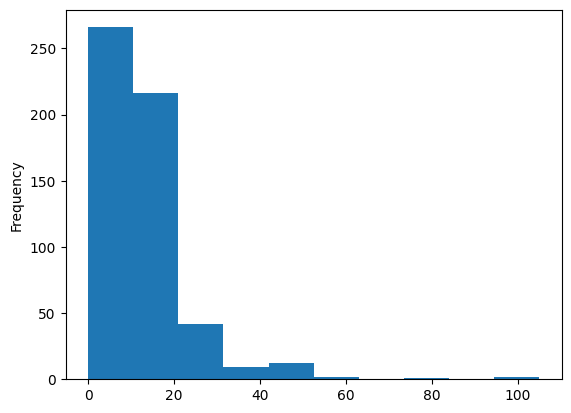

In [6]:
#  Діаграма розподілу цін

import matplotlib.pyplot as plt

df['price'].plot(kind='hist')
plt.show()

In [7]:
# Визначаємо яка ціна у нас максимальна, мінімальна, середня, медіанна

max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f"Максимальна ціна: {max_price}")
print(f"Мінімальна ціна: {min_price}")
print(f"Середня ціна: {mean_price}")
print(f"Медіанна ціна: {median_price}")


Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


Максимальна ціна?
Відповідь: 105

Мінімальна ціна?
Відповідь: 0

Середня ціна?
Відповідь: 13.1

Медіанна ціна?
Відповідь: 11.0

Пошук та сортування даних

In [8]:
# Який рейтинг у датасеті найвищий?
max_rating = df['user_rating'].max()
print(f"Максимальний рейтинг: {max_rating}")
# Відповідь: 4.9

# Скільки книг мають такий рейтинг?
books_with_max_rating = df[df['user_rating'] == max_rating]
print(len(books_with_max_rating))
# Відповідь: 52

# Яка книга має найбільше відгуків?
most_reviews = df['reviews'].max()
book_with_most_reviews = df[df['reviews'] == most_reviews]['name'].iloc[0]
print(book_with_most_reviews)
# Відповідь: Where the Crawdads Sing

# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?
books_2015 = df[df['year'] == 2015]
most_expensive_book_2015 = books_2015.loc[books_2015['price'].idxmax()]['name']
print(most_expensive_book_2015)
# Відповідь: Publication Manual of the American Psychological Association, 6th Edition

# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?
fiction_books_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)]
print(len(fiction_books_2010))
# Відповідь: 20

# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?
books_2010_2011 = df[(df['year'].isin([2010, 2011])) & (df['user_rating'] == 4.9)]
print(len(books_2010_2011))
# Відповідь: 1

# Сортування книг 2015 року з ціною менше 8 доларів
# Яка книга остання у відсортованому списку?
cheap_books_2015 = books_2015[books_2015['price'] < 8].sort_values(by='price')
last_cheap_book_2015 = cheap_books_2015.iloc[0]['name']
print(last_cheap_book_2015)
# Відповідь: To Kill a Mockingbird

Максимальний рейтинг: 4.9
52
Where the Crawdads Sing
Publication Manual of the American Psychological Association, 6th Edition
20
1
To Kill a Mockingbird


Який рейтинг у датасеті найвищий?
Відповідь: 4.9

Скільки книг мають такий рейтинг?
Відповідь: 52

Яка книга має найбільше відгуків?
Відповідь: Where the Crawdads Sing

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?
Відповідь: Publication Manual of the American Psychological Association, 6th Edition

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?
Відповідь: 20

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?
Відповідь: 1

Сортування книг 2015 року з ціною менше 8 доларів
Яка книга остання у відсортованому списку?
Відповідь: To Kill a Mockingbird

Агрегування даних та з'єднання таблиць

In [9]:
# Максимальна та мінімальна ціни для кожного жанру
genre_prices = df.groupby('genre')['price'].agg(['max', 'min'])
print(genre_prices)
# Відповідь: Максимальна ціна для жанру Fiction: 82
# Відповідь: Мінімальна ціна для жанру Fiction: 0
# Відповідь: Максимальна ціна для жанру Non Fiction: 105
# Відповідь: Мінімальна ціна для жанру Non Fiction: 0


# Кількість книг для кожного автора
author_counts = df.groupby('author').size().reset_index(name='counts')
print(author_counts.shape)
# Якої розмірності вийшла таблиця?
# Відповідь: (248, 2)

most_books_author = author_counts.loc[author_counts['counts'].idxmax()]
print(most_books_author)
# Який автор має найбільше книг?
# Відповідь: Jeff Kinney
# Скільки книг цього автора?
# Відповідь: 12

# Середній рейтинг для кожного автора
author_ratings = df.groupby('author')['user_rating'].mean().reset_index(name='mean_rating')

author_with_lowest_rating = author_ratings.loc[author_ratings['mean_rating'].idxmin()]
print(author_with_lowest_rating)
# У якого автора середній рейтинг мінімальний?
# Відповідь: Donna Tartt
# Який у цього автора середній рейтинг?
# Відповідь: 3.9

# З'єднання таблиць та сортування:
author_stats = pd.concat([author_counts.set_index('author'), author_ratings.set_index('author')], axis=1)
sorted_author_stats = author_stats.sort_values(by=['counts', 'mean_rating'], ascending=[False, False])
print(sorted_author_stats.head(1))
# Який автор перший у списку?
# Відповідь: Jeff Kinney


             max  min
genre                
Fiction       82    0
Non Fiction  105    0
(248, 2)
author    Jeff Kinney
counts             12
Name: 120, dtype: object
author         Donna Tartt
mean_rating            3.9
Name: 71, dtype: object
             counts  mean_rating
author                          
Jeff Kinney      12          4.8


Максимальна та мінімальна ціни для кожного жанру
Відповідь: Максимальна ціна для жанру Fiction: 82
Відповідь: Мінімальна ціна для жанру Fiction: 0
Відповідь: Максимальна ціна для жанру Non Fiction: 105
Відповідь: Мінімальна ціна для жанру Non Fiction: 0


Кількість книг для кожного автора
Якої розмірності вийшла таблиця?
Відповідь: (248, 2)

Який автор має найбільше книг?
Відповідь: Jeff Kinney
Скільки книг цього автора?
Відповідь: 12

Середній рейтинг для кожного автора
У якого автора середній рейтинг мінімальний?
Відповідь: Donna Tartt
Який у цього автора середній рейтинг?
Відповідь: 3.9

З'єднання таблиць та сортування:
Який автор перший у списку?
Відповідь: Jeff Kinney

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(author_stats['author'], author_stats['mean_rating'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Автор')
plt.ylabel('Рейтинг')
plt.title('Рейтинг авторів')
plt.tight_layout()
plt.show()


KeyError: 'author'

<Figure size 1000x600 with 0 Axes>